# 第五章　換気設備 / Chapter 5 Ventilation System

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pyhees.section5 import calc_E_E_V_d_t

# 試算例

In [2]:
def get_default_ventilation():
    
    n_p = 4.0
    A_A = 120.0
    V = {
        'type' : 'ダクト式第一種換気設備',
        'input' : '比消費電力',
        'f_SFP' : 0.1,
        'v_e' : 0.9,
        'N' : 2.2,
    }
    HEX = None
    
    return n_p, A_A, V, HEX


In [3]:
def get_each_graph(_E_V_d_t):

    import matplotlib.pyplot as plt

    _E_V_d = np.sum(_E_V_d_t.reshape(365,24), axis = 1)

    fig = plt.figure(figsize = (20,7))

    grh_day = fig.add_subplot(211)
    grh_day.set_ylabel('MJ/d')
    grh_day.set_xlabel('day')
    grh_day.plot(_E_V_d, label = "E_V")
    grh_day.legend()

    grh_date = fig.add_subplot(212)
    grh_date.set_ylabel('MJ/h')
    grh_date.set_xlabel('hour')
    grh_date.plot(_E_V_d_t.reshape(365,24)[334], label = "E_V:12/1")
    grh_date.plot(_E_V_d_t.reshape(365,24)[59], label = "E_V:3/1")
    grh_date.legend()

    plt.show()


### 計算条件1

初期条件での計算

In [4]:
n_p, A_A, V, HEX = get_default_ventilation()

testcase1 = calc_E_E_V_d_t(n_p, A_A, V, HEX)
np.sum(testcase1)

731.4242299999999

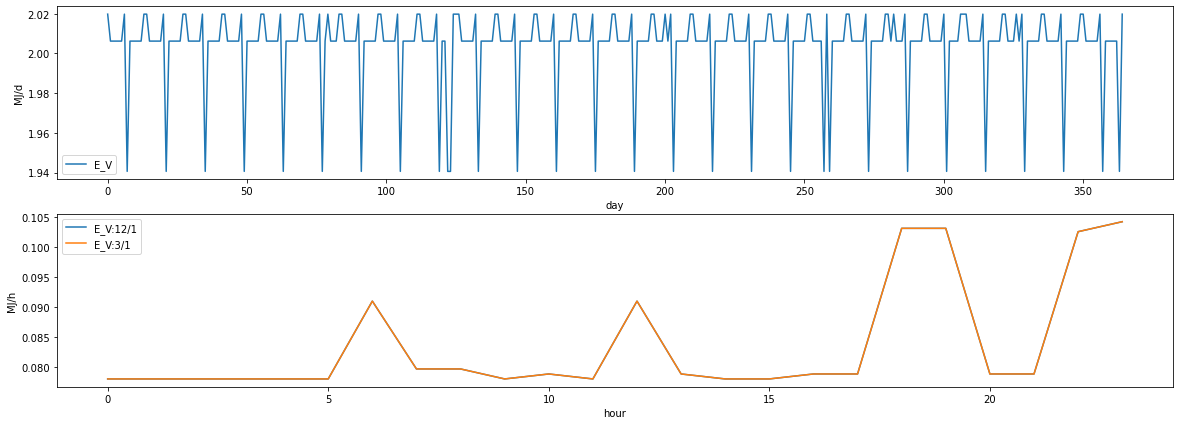

In [5]:
get_each_graph(testcase1)

### 計算条件2

- 仮想居住人数を2.0人に変更
- 床面積の合計を70.0m2に変更

In [6]:
n_p, A_A, V, HEX = get_default_ventilation()
n_p = 2.0
A_A = 70.0

testcase2 = calc_E_E_V_d_t(n_p, A_A, V, HEX)
np.sum(testcase2)

422.2448700000001

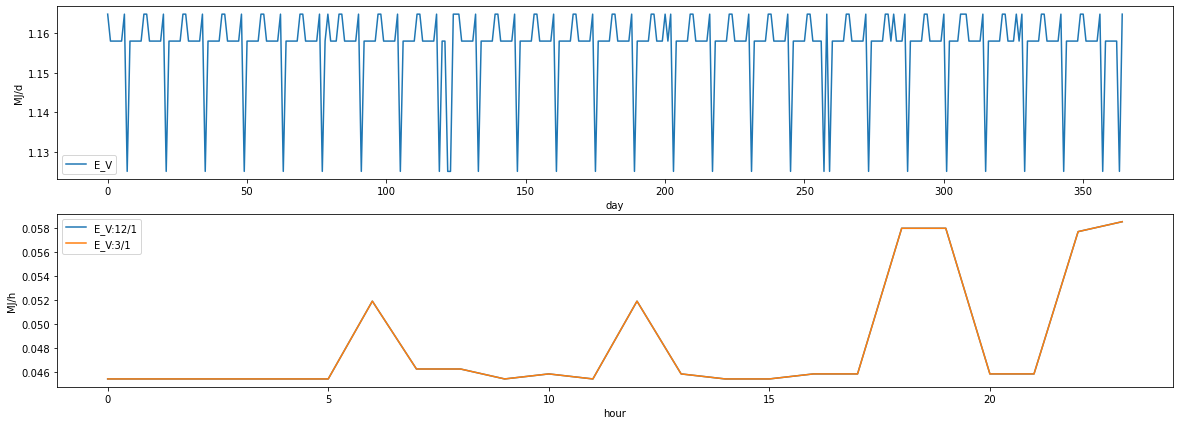

In [7]:
get_each_graph(testcase2)

### 試算例3

- 換気設備の方式をダクト式第二種換気設備又はダクト式第三種換気設備に変更

In [8]:
n_p, A_A, V, HEX = get_default_ventilation()
V['type'] = 'ダクト式第二種換気設備又はダクト式第三種換気設備'

testcase3 = calc_E_E_V_d_t(n_p, A_A, V, HEX)
np.sum(testcase3)

663.5867900000001

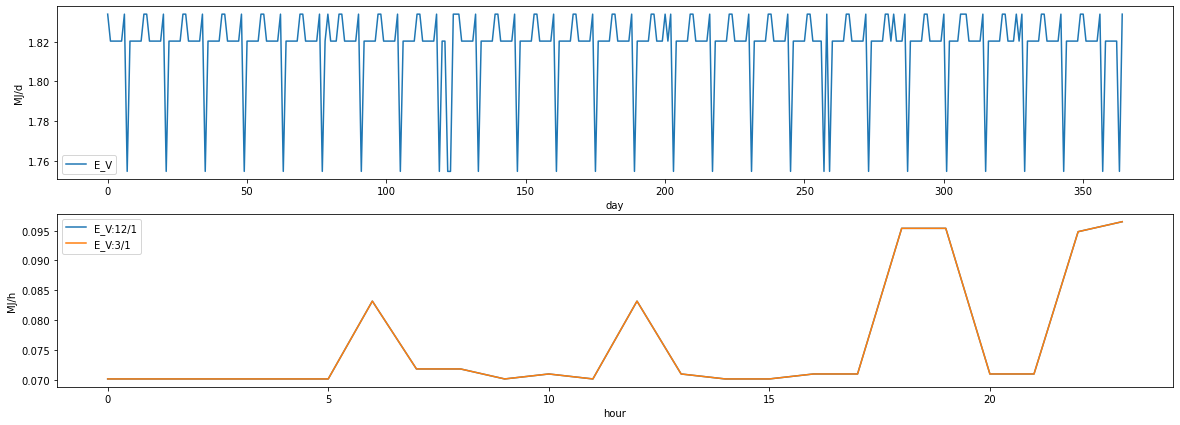

In [9]:
get_each_graph(testcase3)

### 試算例4

- 比消費電力を0.3W/(m3/h)に変更

In [10]:
n_p, A_A, V, HEX = get_default_ventilation()
V['f_SFP'] = 0.3

testcase4 = calc_E_E_V_d_t(n_p, A_A, V, HEX)
np.sum(testcase4)

2088.17303

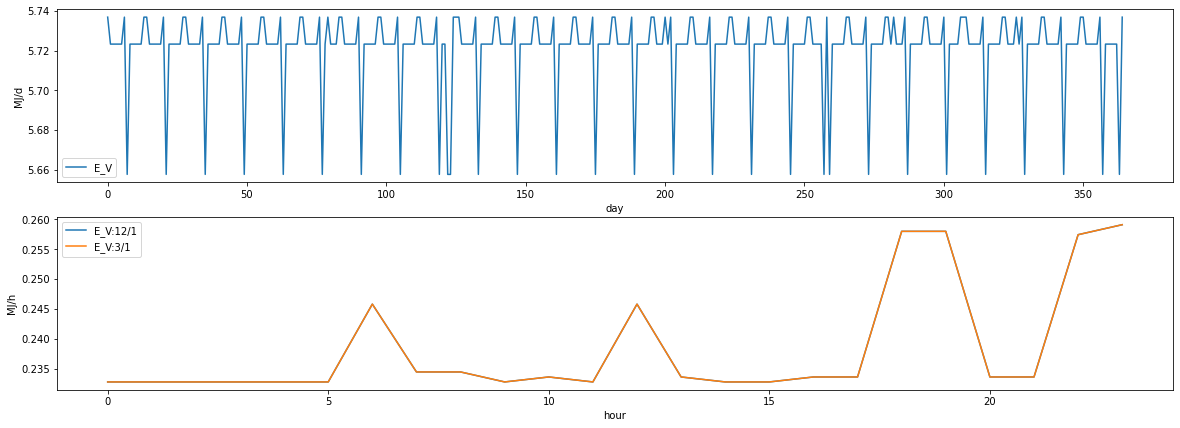

In [11]:
get_each_graph(testcase4)

### 試算例5

- 比消費電力を入力しないに変更

In [12]:
n_p, A_A, V, HEX = get_default_ventilation()
V['input'] = '評価しない'

testcase5 = calc_E_E_V_d_t(n_p, A_A, V, HEX)
np.sum(testcase5)

3444.9218299999998

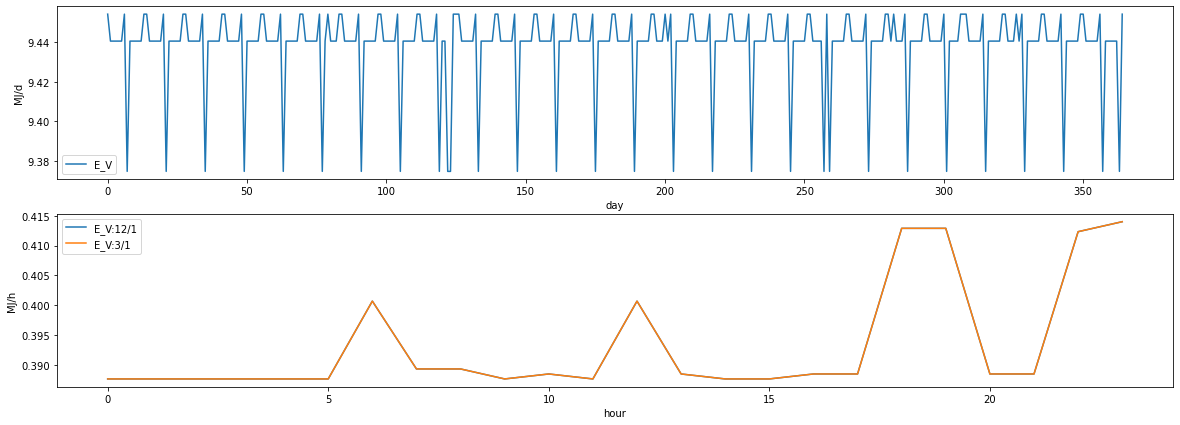

In [13]:
get_each_graph(testcase5)

### 試算例6

- 有効換気量率を0.6に変更

In [14]:
n_p, A_A, V, HEX = get_default_ventilation()
V['v_e'] = 0.6

testcase6 = calc_E_E_V_d_t(n_p, A_A, V, HEX)
np.sum(testcase6)

1070.6114300000002

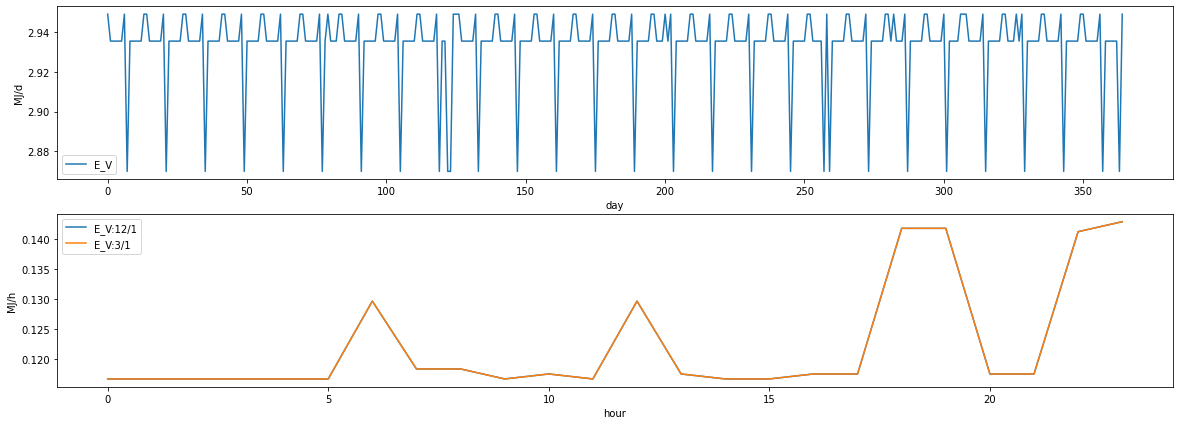

In [15]:
get_each_graph(testcase6)

### 試算例7

- 換気回数3に変更

In [16]:
n_p, A_A, V, HEX = get_default_ventilation()
V['N'] = 3

testcase7 = calc_E_E_V_d_t(n_p, A_A, V, HEX)
np.sum(testcase7)

978.1058300000001

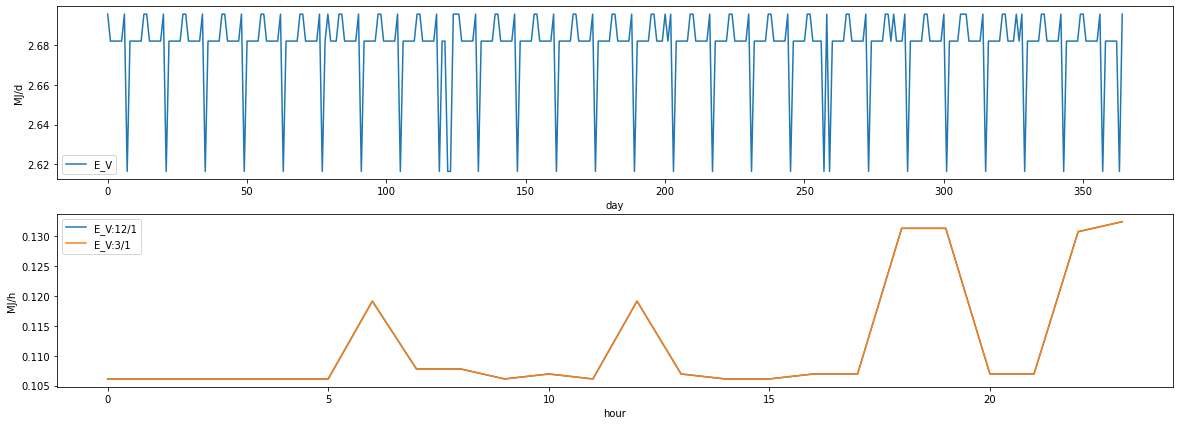

In [17]:
get_each_graph(testcase7)

## 比較

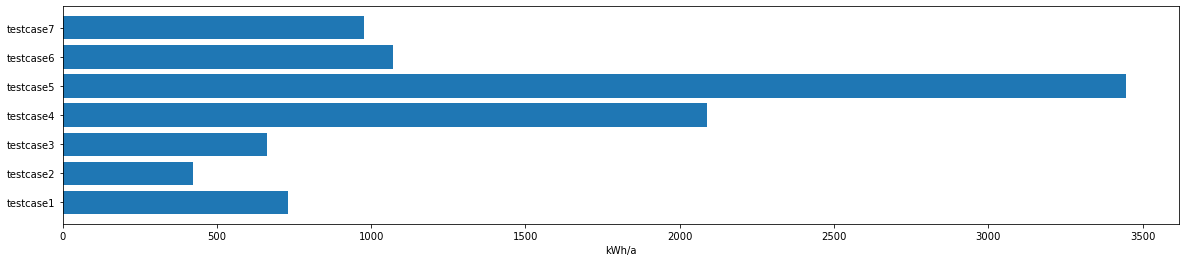

In [18]:
dat = {"testcase1":sum(testcase1),"testcase2" : sum(testcase2), "testcase3" : sum(testcase3), "testcase4" : sum(testcase4),
      "testcase5" : sum(testcase5), "testcase6" : sum(testcase6), "testcase7" : sum(testcase7)}
xx = list(dat.keys())
yy = list(dat.values())

fig = plt.figure(figsize=(20,4))
axt = fig.add_subplot(111)
axt.barh(xx,yy)
axt.set_xlabel("kWh/a")
plt.show()
